## 데이터 전처리
[목차]
- 데이터 전처리란? 무엇이며, 데이터 전처리를 왜 하는가?

- 데이터 전처리 기초
1. missingno 패키지(결측 데이터 검색)
2. sklearn.impute 패키지(결측 데이터 대체)
3. patsy 패키지(데이터 선택, 변환, 추가, 스케일링)

- 범주형 데이터 처리
1. 범주형 데이터의 정의
2. 범주형 데이터의 변형
3. 더비변수화
4. pasty 패키지를 사용한 더미변수화
5. 축소랭크 방식
6. 두 개의 범주형 변수가 있는 경우
7. 카테고리 임베딩

## 데이터 전처리(Data Preprocessing)란?무엇이며, 데이터 전처리를 왜 하는가?
**“Garbage In, Garbage Out”**
=> **“쓰레기가 들어가면 쓰레기가 나온다”** 라는 의미로,

쓰레기(잘 가공되지 않은 데이터)가 들어가면 쓰레기(이상한 분석결과)가 나온다는 것을 의미

=> 데이터를 불러왔으면, 분석하려는 문제에 맞추어 데이터를 가공해야함

<img src = "https://i0.wp.com/www.dodomira.com/wp-content/uploads/2016/10/Time-1200x511.jpg?w=960 " height = 400 width = 800 >

- 사진에 대한 설명: 데이터 분석을 할 때 60% 정도의 시간을 데이터를 정리하고 구성하는데 사용, 데이터를 수집하는 시간은 19% 정도임
- 즉, 데이터 전처리는 데이터 분석 과정 속에서 가장 많은 시간이 투입됨

데이터 전처리는 데이터에서 1.필요없는 변수를 제거하고, 2.중복값을 처리하고, 3.결측값을 대체하며, 4.새로운 변수를 생성하는 등 데이터를 분석하기 좋은 형태로 다양하게 수행하는 과정

## 데이터 전처리 기초

-> 데이터에서 필요한 정보를 추출하기 위해 다음과 같은 패키지를 사용하여 전처리를 진행한다.

1. missingno 패키지(결측 데이터 검색)

2. sklearn.impute 패키지(결측 데이터 대체)

3. patsy 패키지(데이터 선택, 변환, 추가, 스케일링)

=> 데이터를 분석이나 모델링에 적용하기 전에 데이터를 정리하고 가공하는 과정. 

## pandas에서 결측 데이터를 찾는 방법 (missingno 패키지)
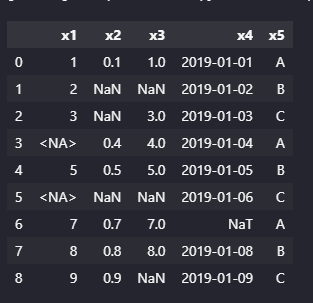

현실 데이터를 수집하다보면, 데이터의 일부를 얻지 못하거나 누락되는 결측 데이터NaN(not a number)이 생길 수 있음(표 참조)

이를 찾는 데 사용할 수 있는 주요 메서드는..

1-1. isnull() 또는 isna()

1-2. notnull() 또는 notna()

1-3. any() 및 all()

1-4. missingno 패키지


In [108]:
##1

!pip install pandas
import pandas as pd

import matplotlib.pyplot as plt

from io import StringIO

csv_data = StringIO("""
x1,x2,x3,x4,x5
1,0.1,"1",2019-01-01,A
2,,,2019-01-02,B
3,,"3",2019-01-03,C
,0.4,"4",2019-01-04,A
5,0.5,"5",2019-01-05,B
,,,2019-01-06,C
7,0.7,"7",,A
8,0.8,"8",2019-01-08,B
9,0.9,,2019-01-09,C
""")

df = pd.read_csv(csv_data, dtype={"x1": pd.Int64Dtype()}, parse_dates=["x4"])
df


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


,x1,x2,x3,x4,x5
0,1,0.1,1.0,2019-01-01,A
1,2,NaN,NaN,2019-01-02,B
2,3,NaN,3.0,2019-01-03,C
3,<NA>,0.4,4.0,2019-01-04,A
4,5,0.5,5.0,2019-01-05,B
5,<NA>,NaN,NaN,2019-01-06,C
6,7,0.7,7.0,NaT,A
7,8,0.8,8.0,2019-01-08,B
8,9,0.9,NaN,2019-01-09,C


In [109]:
##2

df. isnull()

,x1,x2,x3,x4,x5
0,False,False,False,False,False
1,False,True,True,False,False
2,False,True,False,False,False
3,True,False,False,False,False
4,False,False,False,False,False
5,True,True,True,False,False
6,False,False,False,True,False
7,False,False,False,False,False
8,False,False,True,False,False


In [110]:
##3

df.notnull()

,x1,x2,x3,x4,x5
0,True,True,True,True,True
1,True,False,False,True,True
2,True,False,True,True,True
3,False,True,True,True,True
4,True,True,True,True,True
5,False,False,False,True,True
6,True,True,True,False,True
7,True,True,True,True,True
8,True,True,False,True,True


In [111]:
##4

df.any()

x1    True
x2    True
x3    True
x4    True
x5    True
dtype: bool

In [112]:
##5

df. isnull().sum()

x1    2
x2    3
x3    3
x4    1
x5    0
dtype: int64


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


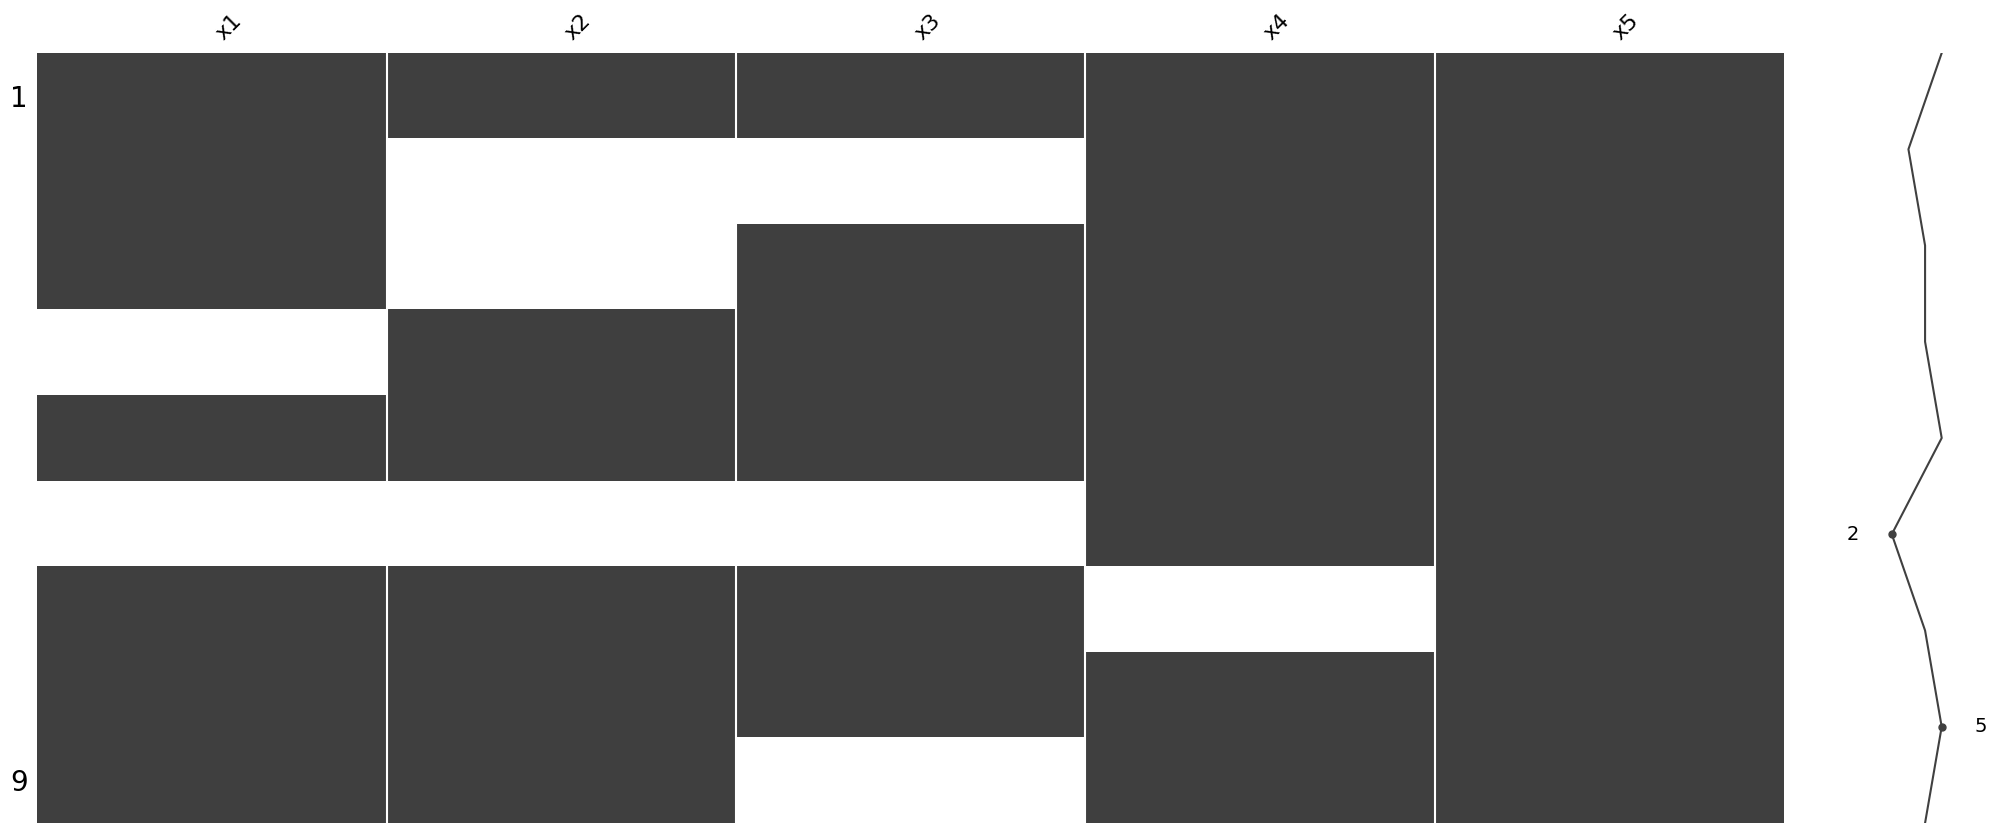

In [113]:
##6

# data가 많아지면.. 결측 데이터를 일일히 확인할 수 없음
# sum()메서드를 결합해 결측 데이터의 갯수정도는 유추 가능!
# 이를 해결하기 위한 방법으로 ... missingno 패키지 사용

# missingno 패키지로 대규모 데이터에서 결측 데이터 시각화 하기
!pip install missingno

import missingno as msno

msno.matrix(df)
plt.show()


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


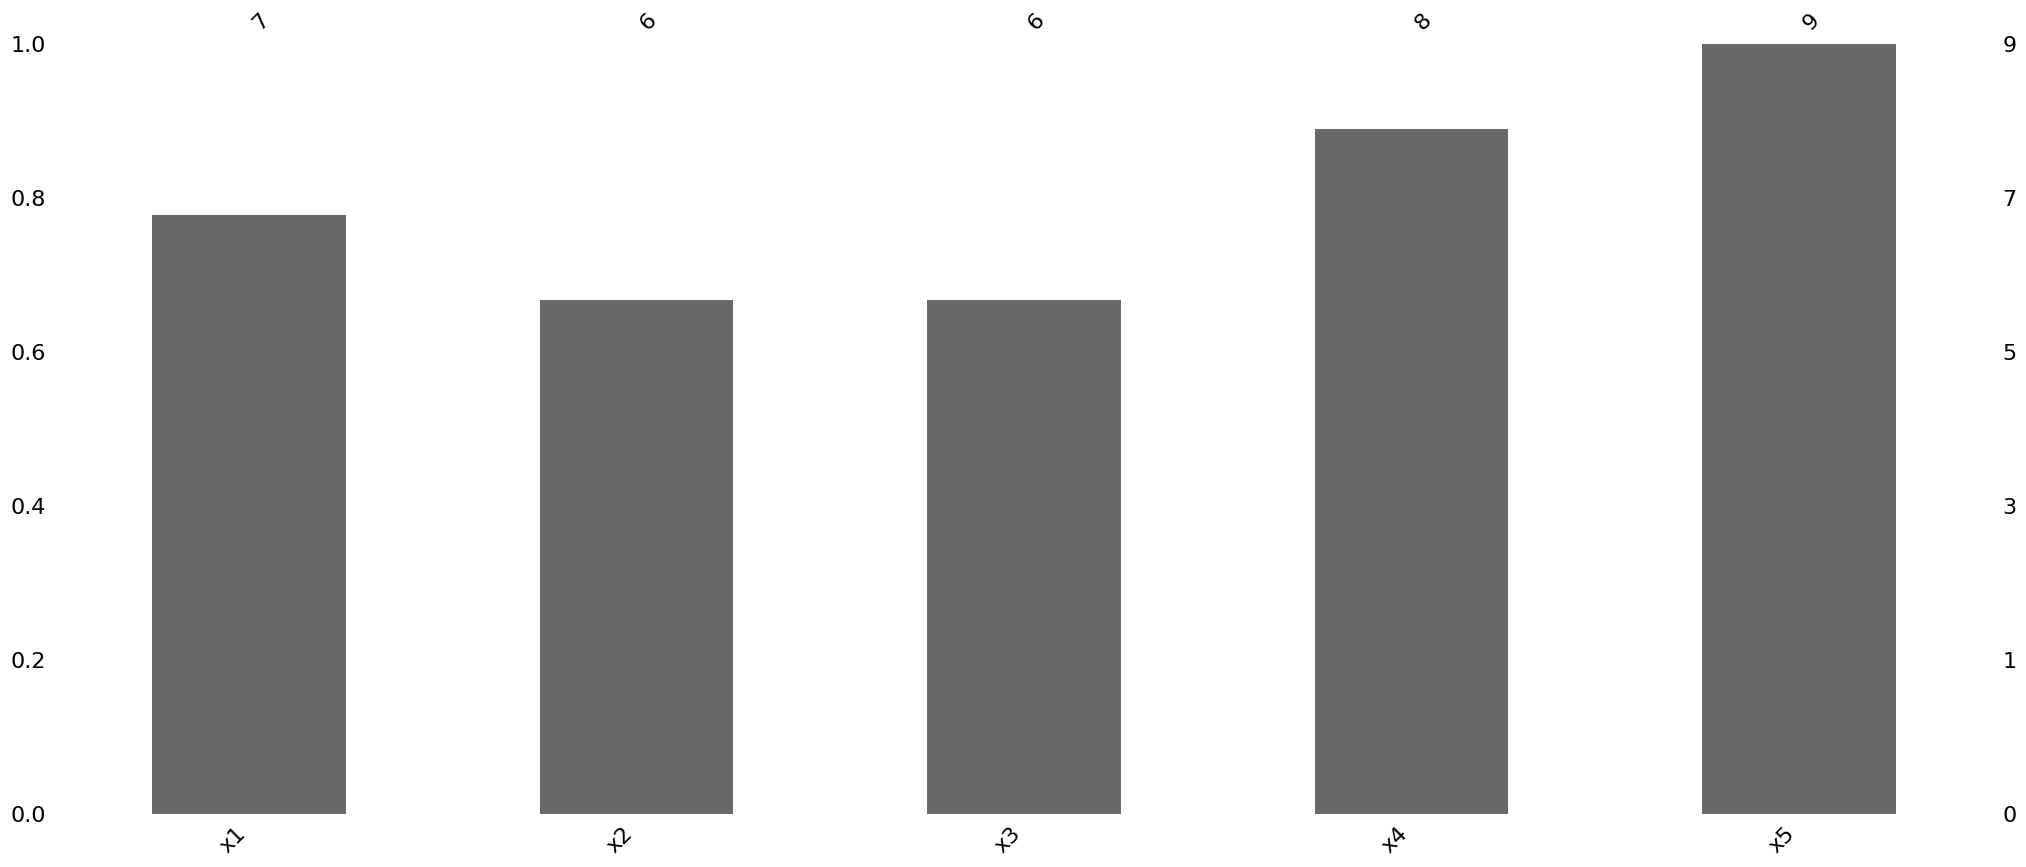

In [114]:
##7

#각 열에 결측 데이터가 얼마나 존재하는지 '시각화'해보자
import missingno as msno
import matplotlib.pyplot as plt
!pip install --upgrade matplotlib

msno. bar(df)
plt.show()

In [115]:
##8

# 결측 데이터 처리하기
## 결측된 데이터가 많은 경우 해당 데이터 열 전체 삭제 가능
### 결측 데이터가 일부인 경우 가장 그럴듯한 값으로 대체 가능 -> 이는 결측 데이터 대체(imputation)라고도 함

#결측 데이터가 존재하는 행이나 열을 지우는 함수들
df.dropna()

,x1,x2,x3,x4,x5
0,1,0.1,1.0,2019-01-01,A
4,5,0.5,5.0,2019-01-05,B
7,8,0.8,8.0,2019-01-08,B


In [116]:
##9

#axis=1로 설정하면 결측 데이터가 있는 열 제거
df.dropna(axis=1)

,x5
0,A
1,B
2,C
3,A
4,B
5,C
6,A
7,B
8,C


In [117]:
##10

#axis=0로 설정하면 결측 데이터가 있는 행 제거
df.dropna(axis=0)

,x1,x2,x3,x4,x5
0,1,0.1,1.0,2019-01-01,A
4,5,0.5,5.0,2019-01-05,B
7,8,0.8,8.0,2019-01-08,B


In [118]:
##11

#thresh인수는 특정 갯수 이상의 비결측 데이터가 있는 행 또는 열만 남김
df.dropna(thresh=7, axis=1)
#최소 7개의 이상의 비결측 값이 있는 열만 남고, 나머지는 제거하라는 의미

,x1,x4,x5
0,1,2019-01-01,A
1,2,2019-01-02,B
2,3,2019-01-03,C
3,<NA>,2019-01-04,A
4,5,2019-01-05,B
5,<NA>,2019-01-06,C
6,7,NaT,A
7,8,2019-01-08,B
8,9,2019-01-09,C


In [119]:
#11-1 thresh 개념 추가 설명
#thresh 매개변수는 "임계값"을 의미하며, 이는 어떤 조건을 충족하는 데이터를 남길지 결정하는 데 사용

import pandas as pd
import numpy as np

data = {'A': [1, 2, np.nan, 4, 5],
        'B': [np.nan, 2, 3, 4, 5],
        'C': [1, 2, 3, np.nan, np.nan],
        'D': [1, np.nan, 3, np.nan, 5]}

df = pd.DataFrame(data)
df

,A,B,C,D
0,1.0,NaN,1.0,1.0
1,2.0,2.0,2.0,NaN
2,NaN,3.0,3.0,3.0
3,4.0,4.0,NaN,NaN
4,5.0,5.0,NaN,5.0


In [120]:
df_thresh = df.dropna(thresh=3)

df_thresh

,A,B,C,D
0,1.0,NaN,1.0,1.0
1,2.0,2.0,2.0,NaN
2,NaN,3.0,3.0,3.0
4,5.0,5.0,NaN,5.0


## sklearn.impute 패키지(결측 데이터 대체)

- 결측 데이터 대체하는 방법

- SimpleImputer 클래스에 strategy인수에 따라 대체 하는 방법이 달라진다!

-> 'mean'= 평균값

-> 'median'= 중앙값

-> 'most_frequent'=최빈값


*그럼, strategy 인수 선택은 어떤 기준으로 하나?

1) 데이터가 실수 연속값인 경우 평균,중앙값 사용

1-1) 값의 분포가 대칭적이면 평균이 좋고, 심하게 비대칭이면 중앙값이 적당

2) 데이터가 범주값이거나 정수값인 경우 최빈값 사용

- 이후, fit_transform 메서드를 통해 대체값이 채워진 데이터프레임 생성

In [121]:
#12

# sklearn.impute 패키지 예시
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="most_frequent") #최빈값으로 대체
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
df

,A,B,C,D
0,1.0,2.0,1.0,1.0
1,2.0,2.0,2.0,1.0
2,1.0,3.0,3.0,3.0
3,4.0,4.0,1.0,1.0
4,5.0,5.0,1.0,5.0


## patsy 패키지(데이터 선택, 변환, 추가, 스케일링)

- 데이터프레임에서 원하는 데이터만 선택 or 새로운 데이터 조합을 생성해야 한다

--> 왜? 냐하면~ "데이터 품질 향상"을 위해서!

-> 데이터가 무조건 크고 많다고 좋은 것은 아님. 필요한 데이터가 있는 것이 중요.

따라서, 데이터를 축소하거나 변환하는 것은 데이터를 더 이해하기 쉽게 해주고 인사이트 내기도 좋다!

In [122]:
#13
# demo_data 함수 사용 => x로 시작하는 변수에 대해 임의의 실수 데이터를 생성

!pip install patsy

from patsy import demo_data

df = pd.DataFrame(demo_data("x1", "x2", "x3", "x4", "x5"))
df


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


,x1,x2,x3,x4,x5
0,1.764052,-0.977278,0.144044,0.333674,-2.552990
1,0.400157,0.950088,1.454274,1.494079,0.653619
2,0.978738,-0.151357,0.761038,-0.205158,0.864436
3,2.240893,-0.103219,0.121675,0.313068,-0.742165
4,1.867558,0.410599,0.443863,-0.854096,2.269755


#14
- 데이터 분석 시작할때, 다양한 데이터를 하나의 데이터프레임에 넣고 시작하는 경우가 많음
- patsy 패키지가 제공하는 dmatrx() 함수를 사용하면...
- 데이터 프레임에 상수항을 추가 or 원하는 데이터만 선택 or 변형 가능

- dmatrx() 함수에 모형 정의 문자열 formula와 원 데이터를 담은 데이터프레임 data을 입력 => formula에서 지정한 대로 변환된 데이터 data_transformed를 출력

In [123]:
data_transformed = dmatrix(formula, data)

NameError: name 'formula' is not defined

In [ ]:
#15
#formula는 데이터 열 이름 기반으로 구성된 문자열
#선택하고자 하는 데이터 열 이름을 +로 연결한 formula 문자열을 입려하면 자동으로 해당 데이터만 뽑아줌

#예를 들어 전체 데이터 중 x1만을 뽑고 싶으면 formula 문자열에 x1 + 0이라고 입력

from patsy import dmatrix 

dmatrix("x1 + 0", data=df)

NameError: name 'dmatrix' is not defined

In [ ]:
#15
#전체 데이터 중 x1, x2, x3를 뽑고 싶으면 formula 문자열에 x1 + x2 + x3 + 0이라고 입력

dmatrix("x1 + x2 + x3 + 0", data=df)

DesignMatrix with shape (5, 3)
       x1        x2       x3
  1.76405  -0.97728  0.14404
  0.40016   0.95009  1.45427
  0.97874  -0.15136  0.76104
  2.24089  -0.10322  0.12168
  1.86756   0.41060  0.44386
  Terms:
    'x1' (column 0)
    'x2' (column 1)
    'x3' (column 2)

In [ ]:
#16
#+ 0은 1로 구성된 상수항을 넣지 말라는 뜻이다. 만약 이 부분이 없으면 patsy는 자동으로 가장 앞에 Intercept란 이름의 상수항 데이터를 추가

dmatrix("x1 + x2 + x3", data=df)

DesignMatrix with shape (5, 4)
  Intercept       x1        x2       x3
          1  1.76405  -0.97728  0.14404
          1  0.40016   0.95009  1.45427
          1  0.97874  -0.15136  0.76104
          1  2.24089  -0.10322  0.12168
          1  1.86756   0.41060  0.44386
  Terms:
    'Intercept' (column 0)
    'x1' (column 1)
    'x2' (column 2)
    'x3' (column 3)

In [ ]:
#17
#- 1도 + 0과 같은 뜻
dmatrix("x1 + x2 + x3 - 1", data=df)

DesignMatrix with shape (5, 3)
       x1        x2       x3
  1.76405  -0.97728  0.14404
  0.40016   0.95009  1.45427
  0.97874  -0.15136  0.76104
  2.24089  -0.10322  0.12168
  1.86756   0.41060  0.44386
  Terms:
    'x1' (column 0)
    'x2' (column 1)
    'x3' (column 2)

In [ ]:
#18
# dmatrix() 함수는 변수를 어떤 함수에 넣어서 다른 갑으로 만드는 수학 변환(transform)도 가능

dmatrix("x1 + np.log(np.abs(x2))", df)

DesignMatrix with shape (5, 3)
  Intercept       x1  np.log(np.abs(x2))
          1  1.76405            -0.02298
          1  0.40016            -0.05120
          1  0.97874            -1.88811
          1  2.24089            -2.27090
          1  1.86756            -0.89014
  Terms:
    'Intercept' (column 0)
    'x1' (column 1)
    'np.log(np.abs(x2))' (column 2)

In [ ]:
#19
#numpy 함수 뿐 아니라 사용자 정의 함수도 사용

def ten_times(x):
    return 10 * x

dmatrix("ten_times(x1)", df)

DesignMatrix with shape (5, 2)
  Intercept  ten_times(x1)
          1       17.64052
          1        4.00157
          1        9.78738
          1       22.40893
          1       18.67558
  Terms:
    'Intercept' (column 0)
    'ten_times(x1)' (column 1)

In [ ]:
#20
#기존의 데이터를 조합 연산하여 새로운 데이터를 만드는 것도 가능
## 특히 두 변수를 곱해서 만들어지는 새로운 변수를 **상호작용(interaction)**이라고 한다. 
### 상호작용은 : 기호를 사용하여 만들어진다.

dmatrix("x1 + x2 + x1:x2 + 0", df)

DesignMatrix with shape (5, 3)
       x1        x2     x1:x2
  1.76405  -0.97728  -1.72397
  0.40016   0.95009   0.38018
  0.97874  -0.15136  -0.14814
  2.24089  -0.10322  -0.23130
  1.86756   0.41060   0.76682
  Terms:
    'x1' (column 0)
    'x2' (column 1)
    'x1:x2' (column 2)

In [ ]:
#21
# 두 변수와 상호작용을 한꺼번에 표시할 때는 *를 사용한다. 따라서 다음 수식은 바로 전의 수식과 동일

dmatrix("x1 * x2 + 0", df)

DesignMatrix with shape (5, 3)
       x1        x2     x1:x2
  1.76405  -0.97728  -1.72397
  0.40016   0.95009   0.38018
  0.97874  -0.15136  -0.14814
  2.24089  -0.10322  -0.23130
  1.86756   0.41060   0.76682
  Terms:
    'x1' (column 0)
    'x2' (column 1)
    'x1:x2' (column 2)

In [ ]:
#21
#상호작용을 제외한 경우에는 I()라는 연산자를 사용하여 연산과정을 명시해야 함
#예를 들어 두 변수 x1과 x2를 더하여 새로운 데이터를 만들고 싶다면 다음과 같이 한다.

dmatrix("x1 + x2 + I(x1 + x2) + 0", df)

DesignMatrix with shape (5, 3)
       x1        x2  I(x1 + x2)
  1.76405  -0.97728     0.78677
  0.40016   0.95009     1.35025
  0.97874  -0.15136     0.82738
  2.24089  -0.10322     2.13767
  1.86756   0.41060     2.27816
  Terms:
    'x1' (column 0)
    'x2' (column 1)
    'I(x1 + x2)' (column 2)

#22

- 선형회귀분석을 할 때는 조건수(condition number)의 영향으로 인해
- 데이터의 평균을 0으로, 표준편차를 1로 만드는 스케일링(scaling) 작업을 하는 것이 분석 결과의 품질을 높일 수 있음
- patsy 패키지는 스케일링을 위한 함수도 제공

1) center(): 평균을 0으로 스케일링

2) standardize(): 평균을 0으로하고 표준편차를 1로 스케일링

3) scale(): standardize() 과 같음

In [ ]:
#23
#예를 들어 x1 데이터의 평균을 제거하는 변환은 다음과 같다.

dm = dmatrix("center(x1) + 0", df)
dm

DesignMatrix with shape (5, 1)
  center(x1)
     0.31377
    -1.05012
    -0.47154
     0.79061
     0.41728
  Terms:
    'center(x1)' (column 0)

In [ ]:
#24
#이 변환 연산은 다음과 같이 x1 데이터에서 x1의 평균을 빼는 것과 같다.

df.x1 - np.mean(df.x1)

0    0.313773
1   -1.050123
2   -0.471542
3    0.790613
4    0.417278
Name: x1, dtype: float64

In [ ]:
#25
#이 때 평균값은 design_info라는 속성 내부에 저장됨

dm.design_info.factor_infos

## 이 값을 왜 저장하는가?
# 어떤 학습용 데이터를 사용하여 예측모형을 만든다고 할때.
# 학습성능을 좋게 하기 위해 학습용 데이터의 평균값을 데이터에서 빼는 스케일링을 실시함
# 학습이 끝난 후 이 모형을 사용하여 실제 예측을 할 때 새로운 검증용 데이터를 이 모형에 넣으려면 모형을 학습할 때 사용한 것과 동일한 전처리를 해야 함
# 이 때 학습용 데이터의 평균값을 빼야 한다는 점에 주의하고, 이렇게 하기 위해서는 전처리 과정에서 계산한 평균값을 기억하고 있어야 함.

NameError: name 'dm' is not defined

## 3. 범주형 데이터 처리

## 3-1. 범주형 데이터란?

- 카테고리(category 데이터)

예시) 
1) 성별: 남자, 여자

2) 혈액형: A, B, O, AB

3) 이름: 홍길동, 성춘향, …

4) 주소: 서울, 부산, 대전, …

- 반드시 문자만 범주형 데이터인 것은 아님

- 예를 들어 소속을 나타내는 ‘1반’, ‘2반’, ‘3반’과 같은 데이터는 숫자로 표현된 값이지만 ‘1’이라는 글자를 이용한 것 뿐이지 숫자로서의 의미는 없음.

=> 즉, ‘2’라는 값이 ‘1’이라는 값보다 2배 더 크다는 뜻이 아니므로 이 경우는 범주형 값으로 보아야 함.

## 3-2. 범주형 데이터의 변형 

대부분의 데이터 분석 모형은 숫자만 입력가능 따라서, 숫자로 변형해야 함

이때, 범주형 데이터를 숫자로 변환하는 방법은 두 가지

1) 더미변수화

2) 카테고리 임베딩

3-2(1) 더미 변수화

**더미변수(dummy variable)**는 0 또는 1만 가지는 값으로 어떤 특징의 존재 여부만 표기.

카테고리값을 더미변수화하면 복수의 더미변수 벡터로 표시한다. 예를 들어 성별 x
는 2개의 더미변수 (d1,d2)로 표현할 수 있음.

더미변수 d1는 남자면 1, 여자면 0
더미변수 d2는 남자면 0, 여자면 1이 된다는 것

x=남자 

→d1=1,d2=0

x=여자 

→d1=0,d2=1

In [ ]:
#patsy 패키지를 사용한 더미변수화

#patsy 패키지의 dmatrix() 함수는 데이터프레임의 문자열 범주값을 더미변수로 바꿔준다. 
#예를 들어 다음과 같이 성별을 나타내는 “Male”, “Female”값 데이터가 있는 경우,

df1 = pd.DataFrame(["Male", "Female"], columns=["x"])
df1

,x
0,Male
1,Female


In [ ]:
# dmatrix() 함수에 넣으면 x[Female], x[Male]이라는 두 개의 더미변수를 만들어 줌

# x[Female]는 값이 여자인지 아닌지를 나타내는 더미변수고 x[Male]는 값이 남자인지 아닌지를 나타내는 더미변수

# 주의할 점은 formula 문자열에 항상 + 0을 추가하여 상수항이 생기지 않도록 해야 함

from patsy import dmatrix

dmatrix("x + 0", df1)

NameError: name 'df1' is not defined

In [ ]:
# 다음은 혈액형 데이터를 더미변수로 바꾸는 예제 코드(변수가 2개 이상일 떄)

df2 = pd.DataFrame(["A", "B", "AB", "O"], columns=["x"])
df

,x1,x2,x3,x4,x5
0,1.764052,-0.977278,0.144044,0.333674,-2.552990
1,0.400157,0.950088,1.454274,1.494079,0.653619
2,0.978738,-0.151357,0.761038,-0.205158,0.864436
3,2.240893,-0.103219,0.121675,0.313068,-0.742165
4,1.867558,0.410599,0.443863,-0.854096,2.269755


In [ ]:
# #각각의 범주값에 대응하는 더미변수는 알파벳 순서로 정해진다. 

# 혈액형의 경우에는 d1이 A형, 
# d2이 AB형, 
# d3이 B형, 
# d4이 O형이다.

dmatrix("x + 0", df2)

DesignMatrix with shape (4, 4)
  x[A]  x[AB]  x[B]  x[O]
     1      0     0     0
     0      0     1     0
     0      1     0     0
     0      0     0     1
  Terms:
    'x' (columns 0:4)

In [ ]:
#데이터가 범주형 값이지만 정수로 표시된 경우에는 C() 연산자를 이용하여 범주형 값임을 명시적으로 지정할 수 있음

df3 = pd.DataFrame([1, 2, 3, 4], columns=["x"])
df3

,x
0,1
1,2
2,3
3,4


In [ ]:
dmatrix("C(x) + 0", df3)

DesignMatrix with shape (4, 4)
  C(x)[1]  C(x)[2]  C(x)[3]  C(x)[4]
        1        0        0        0
        0        1        0        0
        0        0        1        0
        0        0        0        1
  Terms:
    'C(x)' (columns 0:4)

In [ ]:
#더미변수 순서 바꾸기... C() 연산자를 사용하여..

# 예시는 혈액형 
# d1이 A형, 
# d2이 B형, 
# d3이 AB형, 
# d4이 O형으로 만들고 싶으면 다음과 같이 level 인수를 사용한다.

dm = dmatrix("C(x, levels=['A', 'B', 'AB', 'O']) + 0", df2)
dm

DesignMatrix with shape (4, 4)
  Columns:
    ["C(x, levels=['A', 'B', 'AB', 'O'])[A]",
     "C(x, levels=['A', 'B', 'AB', 'O'])[B]",
     "C(x, levels=['A', 'B', 'AB', 'O'])[AB]",
     "C(x, levels=['A', 'B', 'AB', 'O'])[O]"]
  Terms:
    "C(x, levels=['A', 'B', 'AB', 'O'])" (columns 0:4)
  (to view full data, use np.asarray(this_obj))

In [ ]:
np.asarray(dm)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

## 축소랭크 방식

- 지금까지 설명한 더미변수 방식을 풀랭크(full-rank) 방식

- 이와 달리 축소랭크(reducec-rank) 방식은 특정한 하나의 범주값을 기준값(reference, baseline)으로 하고 
- 기준값에 대응하는 더미변수의 가중치는 항상 1으로 놓음
- 다른 범주형 값을 가지는 경우는 기준값 더미변수도 1이고 추가적인 특성을 나타내는 더미변수도 1인 것으로 간주함

- 예를 들어 다음 사진은 x=A를 기준값으로 축소랭크 방식을 사용한 경우(아래 사진 참조)
 
- dmatrix() 함수를 사용시 formula 문자열에 + 0을 생략하면 축소랭크 방식으로 더미변수 생성

- 기준이 되는 더미변수의 이름이 Intercept가 됨

- 기준이 되는 더미변수는 알파벳 순서로 가장 앞의 값이 되며, 
- 다음 예제코드에서는 Female이 기준 범주값이 됨

In [135]:
from PIL import Image
from IPython.display import display

image_path = 'C:/Users/jyjj0/OneDrive/바탕 화면/축소 랭크 방식.png'

img = Image.open(image_path)

if img.mode == 'RGBA':
    img = img.convert('RGB')

img.save('C:/Users/jyjj0/OneDrive/바탕 화면/축소 랭크 방식.png', 'JPEG')

display(img)

In [ ]:

dmatrix("x", df1)


NameError: name 'df1' is not defined

In [ ]:
# 기준 범주값을 다른 값으로 바꾸기 위한 ... Treatment() 함수! -> formula 문자열에서 사용가능

dmatrix("C(x, Treatment('Male'))", df1)

NameError: name 'df1' is not defined

In [ ]:
# 혈액형 데이터를 축소랭크방식으로 더미변수화하면 다음과 같고, 기준 범주값은 A

dmatrix("x", df2)

DesignMatrix with shape (4, 4)
  Intercept  x[T.AB]  x[T.B]  x[T.O]
          1        0       0       0
          1        0       1       0
          1        1       0       0
          1        0       0       1
  Terms:
    'Intercept' (column 0)
    'x' (columns 1:4)

# 두 개의 범주형 변수가 있는 경우

- 다음과 같은 두 가지 방법을 사용할 수 있다.

1) 통합 축소형 방식

2) 상호작용 방식

- 1)통합 축소형 방식은 각각의 변수를 축소형으로 기준값을 더미변수화함

- 다만 기준값을 나타내는 더미변수는 변수의 갯수와 상관없이 하나로 통합

In [ ]:
# 예시) A, B 값을 가지는 범주형 변수 x1과 X, Y 값을 가지는 범주형 변수 x2가 있는 경우

df4 = pd.DataFrame([["A", "X"], ["B", "X"], ["A", "Y"], ["B", "Y"]], columns=["x1", "x2"])
df4

,x1,x2
0,A,X
1,B,X
2,A,Y
3,B,Y


In [ ]:
#1)통합 축소형 방식에서는 다음과 같이 3개의 더미변수 (d1,d2,d3) 생성
 
dmatrix("x1 + x2", df4)

DesignMatrix with shape (4, 3)
  Intercept  x1[T.B]  x2[T.Y]
          1        0        0
          1        1        0
          1        0        1
          1        1        1
  Terms:
    'Intercept' (column 0)
    'x1' (column 1)
    'x2' (column 2)

In [ ]:
#2)상호작용 방식은 두 범주형 변수를 곱해서 각각의 변수의 조합을 나타내는 새로운 범주형 변수를 만드는 방식
#즉 앞의 예제에서는 범주형 독립변수가 하나가 되고 대신 범주형 값이 두 독립변수의 범주형 값들의 조합인 AX, BX, AY, BY의 네가지가 됨

dmatrix("x1:x2 + 0", df4)

DesignMatrix with shape (4, 4)
  x1[A]:x2[X]  x1[B]:x2[X]  x1[A]:x2[Y]  x1[B]:x2[Y]
            1            0            0            0
            0            1            0            0
            0            0            1            0
            0            0            0            1
  Terms:
    'x1:x2' (columns 0:4)

3-2(2)카테고리 임베딩

- 카테고리 임베딩(embedding)은 범주값 대신 범주값의 특성을 나타내는 연속값 혹은 연속값 벡터를 사용하는 방법

- 예를 들면 1) 운동선수의 이름을 나타내는 범주값의 경우 해당 운동선수의 나이, 연봉, 신체능력치 등을 대신 사용하는 경우 2) 지역명을 나타내는 범주값의 경우에는 해당 지역의 면적, 인구수 등을 사용하는 경우

- 그러나 임베딩을 사용하는 경우, 1) 데이터 분석 목적에 맞게 특징을 선택해야 하고 2) 외부의 추가적인 데이터를 조사해야 한다는 부담이 있음

## 주가 데이터 저장하기 (SQLite사용)

- SQLite란, 데이터베이스 관리 시스템(DBMS; Database Management System)

<img src = "https://wikidocs.net/images/page/5326/r17.01.png" height = 400 width = 800 >

-> DBMS란,  그림과 같이 여러 사용자 또는 응용 프로그램이 데이터를 저장하거나 조회할 수 있게 도와주는 시스템 및 소프트웨어

- 대표적으로 MySQL, PostgreSQL, Oracle, MS-SQL가 있음


## SQLite가 무엇인가?
- 가볍게 사용가능한 내장형 데이터 베이스. 별도의 서버 프로세스가 필요 없어 설치 및 관리가 간편함

- 안드로이드폰, 아이폰 app에서 많이 사용됨

## SQLite는 어떻게 쓰는가?

In [ ]:
from IPython.display import HTML

html_code = """
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>위키독스 링크로 이동</title>
</head>
<body>

<!-- 위키독스 링크 -->
<a href="https://wikidocs.net/5328" target="_blank">위키독스로 이동</a>

</body>
</html>
"""

HTML(html_code)
